In [13]:
import pandas as pd
import seaborn as sns
import rho_plus as rp
from baysic.utils import quick_view, json_to_df
IS_DARK = True
theme, cs = rp.mpl_setup(IS_DARK)
rp.plotly_setup(IS_DARK)
rp.bokeh_setup(IS_DARK)

In [2]:
from pathlib import Path
run_id = Path('logs') / '10-08' / 'Ce1B1Rh3' / '1'

df = json_to_df(run_id / 'total.json')
df.head()

,sg_symbol,sg_number,prop_generated,avg_num_successful,prop_actual_success,best_struct,best_relaxed,best_gen_e_form
0,P23,195,0.322581,0.322581,1.0,"[[0. 1.97627175 1.97627175] Rh, [1.976...",[[-4.34897064e-09 2.12242660e+00 2.12242657e...,-7.701523
1,Pm-3,200,0.362319,0.362319,1.0,"[[0. 1.97380102 1.97380102] Rh, [1.973...",[[-3.27448530e-09 2.12242649e+00 2.12242652e...,-7.701523
2,P432,207,0.446429,0.446429,1.0,"[[1.97894645 0. 0. ] Rh, [0. ...",[[ 2.12242641e+00 -2.94897056e-09 -3.25514717e...,-7.701523
3,P-43m,215,0.378788,0.378788,1.0,"[[1.97805262 0. 0. ] Rh, [0. ...",[[ 2.12242669e+00 1.95000000e-09 -2.07448533e...,-7.701523
4,Pm-3m,221,0.393701,0.393701,1.0,"[[0. 1.96366251 1.96366251] Rh, [1.963...",[[-5.89691136e-09 2.12242614e+00 2.12242614e...,-7.701523


In [3]:
quick_view(df['best_relaxed'].iloc[0])

In [4]:
import numpy as np
from pyxtal import Group
test_df = pd.read_pickle('merged_test_data3.pkl')

groups = [Group(gn) for gn in range(2, 231)]

test_df = pd.read_pickle('merged_test_data3.pkl')
comps = pd.Series([tuple(sorted(s.composition.values())) for s in test_df['struct']]).value_counts()
amts = []
for comp in list(comps.head(20).index):
    has_comb = np.array([len(group.list_wyckoff_combinations(comp, Nmax=100)[0]) != 0 for group in groups])
    amts.append(np.sum(has_comb))

combs = pd.Series(amts, index=comps.index[:20])
combs

(1.0, 1.0, 2.0, 6.0)      29
(1.0, 1.0, 2.0)           31
(1.0, 2.0)                31
(1.0, 1.0)                36
(2.0, 2.0, 2.0, 2.0)     101
(2.0, 4.0)               121
(1.0, 2.0, 2.0)           31
(1.0, 3.0, 4.0, 12.0)     34
(1.0, 3.0)                34
(1.0, 1.0, 1.0, 1.0)      23
(2.0, 2.0)               116
(2.0, 2.0, 8.0)          116
(3.0, 3.0, 3.0)           40
(1.0, 1.0, 2.0, 2.0)      31
(1.0, 1.0, 4.0)           33
(2.0, 6.0)               122
(3.0, 9.0)                40
(1.0, 4.0, 12.0)          36
(1.0, 5.0)                24
(6.0, 6.0, 8.0)          113
dtype: int64

In [5]:
combs.sort_values()

(1.0, 1.0, 1.0, 1.0)      23
(1.0, 5.0)                24
(1.0, 1.0, 2.0, 6.0)      29
(1.0, 2.0)                31
(1.0, 1.0, 2.0, 2.0)      31
(1.0, 2.0, 2.0)           31
(1.0, 1.0, 2.0)           31
(1.0, 1.0, 4.0)           33
(1.0, 3.0)                34
(1.0, 3.0, 4.0, 12.0)     34
(1.0, 4.0, 12.0)          36
(1.0, 1.0)                36
(3.0, 3.0, 3.0)           40
(3.0, 9.0)                40
(2.0, 2.0, 2.0, 2.0)     101
(6.0, 6.0, 8.0)          113
(2.0, 2.0)               116
(2.0, 2.0, 8.0)          116
(2.0, 4.0)               121
(2.0, 6.0)               122
dtype: int64

In [6]:
test_df = pd.read_pickle('merged_test_data3.pkl')
list(pd.Series([tuple(sorted(s.composition.values())) for s in test_df['struct']]).value_counts().head(10).index)

[(1.0, 1.0, 2.0, 6.0),
 (1.0, 1.0, 2.0),
 (1.0, 2.0),
 (1.0, 1.0),
 (2.0, 2.0, 2.0, 2.0),
 (2.0, 4.0),
 (1.0, 2.0, 2.0),
 (1.0, 3.0, 4.0, 12.0),
 (1.0, 3.0),
 (1.0, 1.0, 1.0, 1.0)]

In [47]:
str_comps = np.array([''.join([str(int(x)) for x in sorted(s.composition.values())]) for s in test_df['struct']])
test_df[str_comps == '26']

,material_id,formula_pretty,nsites,spacegroup,nelements,elements_list,CrystalSystem,category,nontrivial_coordinates,struct
135,mp-11251,Mg3Au,8,194,2,Au Mg,Hexagonal,polymorph_binary,1,"[[2.322594 1.34095268 8.61177969] Mg, [ 2.32..."
140,mp-9761,ReO3,8,182,2,O Re,Hexagonal,polymorph_binary,1,"[[ 2.457787 -1.41900717 3.37902225] Re, [2...."
162,mp-1231,Cr3Ga,8,223,2,Cr Ga,Cubic,binary_easy,0,"[[1.13905202 0. 2.27810405] Cr, [3.417..."


In [15]:
from baysic.lattice import LATTICES

run_id = Path('logs') / '10-08' / 'Ce1B1Rh3' / '1'

big_df = []

for lat_type in LATTICES:
    groups = lat_type.get_groups()

    for group in groups:
        path = run_id / f'{group.number}.json'
        if path.exists():
            df = json_to_df(path)
            df['lattice_type'] = lat_type.lattice_type
            df['sg_num'] = group.number
            df['symbol'] = group.symbol
            big_df.append(df)

df = pd.concat(big_df).reset_index(drop=True)
df

,gen,e_form,wsyms,lat_matrix,lat_vol,lattice_type,sg_num,symbol
0,"[[0. 2.39095092 2.39095092] Rh, [2.390...",0.096640,c_a_b,"[4.7819018364, 0.0, 0.0, 0.0, 4.7819018364, 0....",109.345764,cubic,195,P23
1,"[[2.34164548 0. 0. ] Rh, [0. ...",-0.071805,d_b_a,"[4.6832909584, 0.0, 0.0, 0.0, 4.6832909584, 0....",102.719627,cubic,195,P23
2,"[[0. 1.97712088 1.97712088] Rh, [1.977...",-0.834786,c_a_b,"[3.9542417526, 0.0, 0.0, 0.0, 3.9542417526, 0....",61.828636,cubic,195,P23
3,"[[2.43172622 0. 0. ] Rh, [0. ...",0.233768,d_b_a,"[4.8634524345, 0.0, 0.0, 0.0, 4.8634524345, 0....",115.036064,cubic,195,P23
4,"[[0. 1.97627175 1.97627175] Rh, [1.976...",-0.834854,c_a_b,"[3.9525434971, 0.0, 0.0, 0.0, 3.9525434971, 0....",61.749008,cubic,195,P23
...,...,...,...,...,...,...,...,...
1521,"[[ 1.27853954 -2.21449542 0. ] Rh, [1....",0.449464,f_b_a,"[2.5570790768, -4.4289908409, 0.0, 2.557079076...",125.447853,hexagonal,191,P6/mmm
1522,"[[ 1.38678622 -2.40198421 3.11089039] Rh, [1....",0.595460,g_a_b,"[2.7735724449, -4.8039684296, 0.0, 2.773572444...",165.799942,hexagonal,191,P6/mmm
1523,"[[ 1.33985794 -2.32070208 2.41801381] Rh, [1....",0.441771,g_a_b,"[2.6797158718, -4.6414041519, 0.0, 2.679715871...",120.297577,hexagonal,191,P6/mmm
1524,"[[ 1.30175817 -2.25471115 0. ] Rh, [1....",0.512537,f_b_a,"[2.6035163403, -4.5094223022, 0.0, 2.603516340...",163.934891,hexagonal,191,P6/mmm


/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.



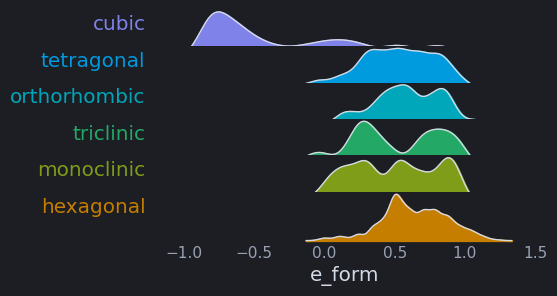

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def ridge_plot(
    df: pd.DataFrame,
    group_var: str,
    num_var: str,
    palette: str = 'rho_iso_spectra',
    order_by: str | None = None
):
    if order_by is not None:
        
    g = sns.FacetGrid(df, row=group_var, hue=group_var, aspect=10, height=0.5, palette=palette, sharey=False)

    # Draw the densities in a few steps
    kde_params = dict(bw_adjust=.5)
    g.map(sns.kdeplot, num_var, clip_on=False,
        fill=True, alpha=1, linewidth=1.5, **kde_params)
    g.map(sns.kdeplot, num_var, clip_on=False, color=plt.rcParams['text.color'], lw=1, **kde_params)

    # passing color=None to refline() uses the hue mapping
    # g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.set_ylabel(label, color=color, ha="right", rotation=0)

    g.map(label, "lattice_type")

    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.set_xlabels(num_var)
    g.despine(bottom=True, left=True)

    return g

ridge_plot(df, 'lattice_type', 'e_form')

In [ ]:
from baysic.utils import df_to_json


df_to_json(df, 'CeBRh3_raw.json')

In [48]:
from copy import deepcopy
from tqdm import tqdm

from baysic.structure_evaluation import relaxed_energy
from baysic.utils import df_to_json

best_relaxed = []
best_e_form = []

for struct in tqdm(df['gen']):
    rel, eform = relaxed_energy(deepcopy(struct), long=True)
    best_relaxed.append(rel)
    best_e_form.append(eform)

df['best_relaxed'] = best_relaxed
df['best_e_form'] = best_e_form

df_to_json(df, 'CeBRh3.json')

  2%|▏         | 27/1526 [00:17<16:18,  1.53it/s]


KeyboardInterrupt: 